In [145]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from collections import Counter

### Define quantities

In [148]:
def m_0(sample):
    sample_c = Counter(np.round(sample))
    m_0 = sum([v for k,v in sample_c.items()])
    return m_0
    
def m_1(sample):
    sample_c = Counter(np.round(sample))
    m_1 = sum([k * v for k,v in sample_c.items()])
    return m_1

def m_2(sample):
    sample_c = Counter(np.round(sample))
    m_2 = sum([(k**2) * v for k,v in sample_c.items()])
    return m_2

### Generate samples from the population

#### Great depression

In [320]:
dep_pop = np.concatenate((np.random.normal(1, 0.3, 1000), np.random.normal(9, 0.5, 1000)))
len(dep_pop)

2000

In [321]:
min(dep_pop)

0.015004898436544845

In [322]:
m_1(dep_pop)/m_0(dep_pop), m_2(dep_pop)/m_1(dep_pop), np.mean(np.round(dep_pop))

(4.998, 8.239495798319327, 4.998)

m_1/m_0 is the average

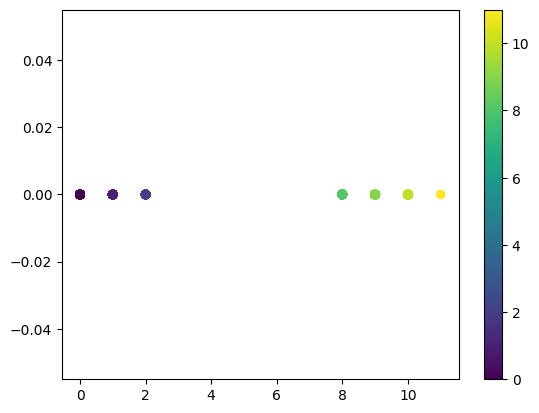

In [323]:
plt.scatter(np.round(dep_pop), y=[0]*dep_pop.shape[0], c= np.round(dep_pop))
plt.colorbar()

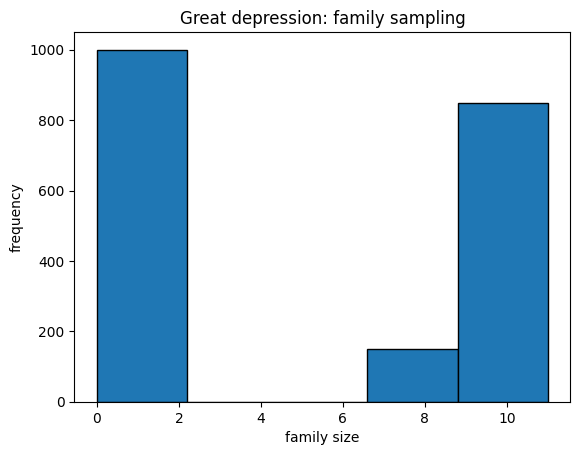

In [324]:
plt.hist(np.round(dep_pop), bins=5, edgecolor='black')
plt.title(label="Great depression: family sampling")
plt.xlabel("family size")
plt.ylabel("frequency")
plt.savefig("../saksham219.github.io/img/dep_samp.png")
plt.show()

In [325]:
dep_pop_child = list(itertools.chain(*[[_]*int(_) for _ in list(np.round(dep_pop))]))
len(dep_pop_child)

9996

In [326]:
exp_dep_pop_fam = m_1(dep_pop)/m_0(dep_pop)
exp_dep_pop_child = m_2(dep_pop)/m_1(dep_pop)
print(f"Expected value- family sampling: {exp_dep_pop_fam}, child sampling: {exp_dep_pop_child}")

Expected value- family sampling: 4.998, child sampling: 8.239495798319327


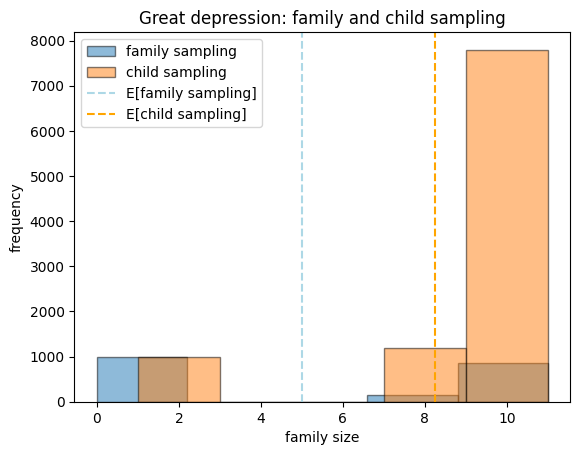

In [327]:
plt.hist(np.round(dep_pop), bins=5, edgecolor='black', label='family sampling', alpha=0.5)
plt.hist(np.round(dep_pop_child), bins=5, edgecolor='black', label='child sampling', alpha=0.5)
plt.axvline(x=exp_dep_pop_fam, color='lightblue',linestyle='--', label='E[family sampling]')
plt.axvline(x=exp_dep_pop_child, color='orange',linestyle='--', label='E[child sampling]')
plt.xlabel("family size")
plt.ylabel("frequency")
plt.title("Great depression: family and child sampling")
plt.legend()
plt.savefig("../saksham219.github.io/img/gd_fam_child_sampling.png")

plt.show()

### is expected value of hist = expected value m1/m_0??? yes

#### Baby boom

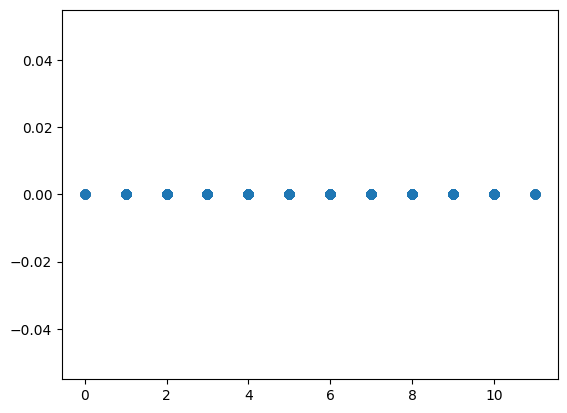

In [356]:
boom_pop = np.random.uniform(0,11,2000)
plt.scatter(np.round(boom_pop), y=[0]*boom_pop.shape[0])

In [357]:
m_1(boom_pop)/m_0(boom_pop), m_2(boom_pop)/m_1(boom_pop), np.mean(np.round(boom_pop))

(5.434, 7.287449392712551, 5.434)

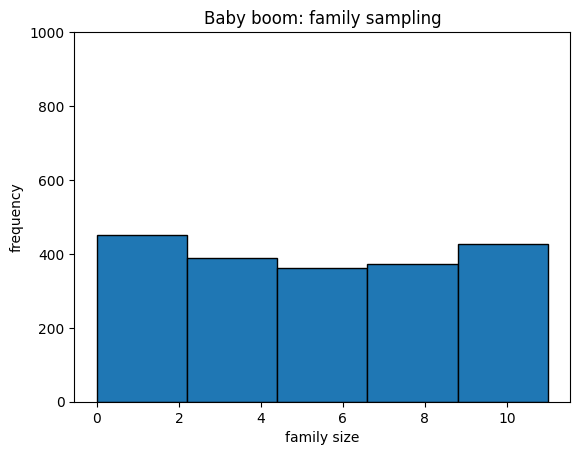

In [358]:
plt.hist(np.round(boom_pop), bins=5, edgecolor='black')
plt.ylim(0, np.histogram(np.round(dep_pop),bins=5)[0].max())
plt.title(label="Baby boom: family sampling")
plt.xlabel("family size")
plt.ylabel("frequency")
plt.savefig("../saksham219.github.io/img/boom_samp.png")
plt.show()

In [359]:
np.round(boom_pop)

array([ 3.,  4.,  3., ...,  9., 10., 10.])

In [360]:
boom_pop_child = list(itertools.chain(*[[_]*int(_) for _ in list(np.round(boom_pop))]))
len(boom_pop_child)

10868

In [361]:
np.round(min(boom_pop))

0.0

In [362]:
min(boom_pop_child),max(boom_pop_child)

(1.0, 11.0)

In [363]:
exp_boom_pop_fam = m_1(boom_pop)/m_0(boom_pop)
exp_boom_pop_child = m_2(boom_pop)/m_1(boom_pop)
print(f"Expected value- family sampling: {exp_boom_pop_fam}, child sampling: {exp_boom_pop_child}")

Expected value- family sampling: 5.434, child sampling: 7.287449392712551


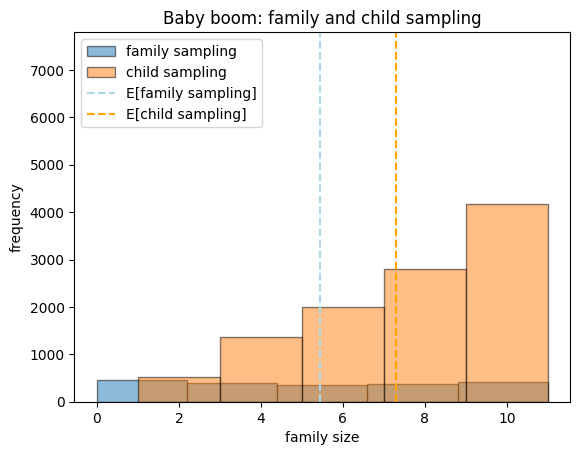

In [364]:
plt.hist(np.round(boom_pop), bins=5, edgecolor='black', label='family sampling', alpha=0.5)
plt.hist(np.round(boom_pop_child), bins=5, edgecolor='black', label='child sampling', alpha=0.5)
plt.axvline(x=exp_boom_pop_fam, color='lightblue',linestyle='--', label='E[family sampling]')
plt.axvline(x=exp_boom_pop_child, color='orange',linestyle='--', label='E[child sampling]')
plt.ylim(0, np.histogram(np.round(dep_pop_child),bins=5)[0].max())
plt.xlabel("family size")
plt.ylabel("frequency")
plt.title("Baby boom: family and child sampling")
plt.legend()
plt.savefig("../saksham219.github.io/img/boom_fam_child_sampling.png")

plt.show()

### Toy example

In [91]:
f_dep = {0:5, 1:6, 2:5, 6:5, 7:6}
f_boom = {0:3,1:3,2:3,3:4,4:3,5:4,6:3,7:4}

In [92]:
m_0_boom = sum(list(f_boom.values()))
m_0_dep = sum(list(f_dep.values()))
m_0_boom, m_0_dep

(27, 27)

In [93]:
m_1_boom = sum([k * v for k,v in f_boom.items()])
m_1_dep = sum([k * v for k,v in f_dep.items()])
m_1_boom, m_1_dep

(99, 88)

In [94]:
m_2_boom = sum([(k**2) * v for k,v in f_boom.items()])
m_2_dep = sum([(k**2) * v for k,v in f_dep.items()])
m_2_boom, m_2_dep

(503, 500)

In [102]:
E_C_boom = m_2_boom/m_1_boom
E_F_boom = m_1_boom/m_0_boom

In [99]:
E_C_dep = m_2_dep/m_1_dep

In [100]:
E_F_dep = m_1_dep/m_0_dep

In [101]:
E_C_dep, E_F_dep

(5.681818181818182, 3.259259259259259)

In [103]:
E_C_boom, E_F_boom

(5.08080808080808, 3.6666666666666665)

In [106]:
E_F_dep < E_F_boom < E_C_boom < E_C_dep

True

In [107]:
print(E_F_dep , E_F_boom , E_C_boom , E_C_dep)

3.259259259259259 3.6666666666666665 5.08080808080808 5.681818181818182
